# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

Importamos las librerias y creamos el dataframe

In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')

hotel = df.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

#### Exploración inicial

In [56]:
#Datos nulos
hotel.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


'company' y 'agent' tienen muchos datos faltantes, puede que sea una variable irrelevante para el análisis

In [57]:
#Datos no nulos
hotel.notna().sum()

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


In [58]:
#Tipo de dato de las variables
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [59]:
#Medidas de resumen del dataframe
hotel.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


In [60]:
hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [61]:
# Reservas canceladas por hotel
pd.crosstab(hotel['hotel'], hotel['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,19017,23112
Resort Hotel,11955,7829


City Hotel tiene muchas mas reservas canceladas que el Resort Hotel

In [62]:
# ¿Cuál es la proporción de reservas canceladas en relación con el total de reservas?
prop_cancelaciones = len(hotel[hotel['is_canceled'] == 1]) / len(hotel) *100
print(f"La proporción de reservas canceladas en relación al total de reservas es {prop_cancelaciones:.2f}%")

La proporción de reservas canceladas en relación al total de reservas es 49.97%


In [63]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

is_canceled,0,1
days_in_waiting_list,,
0,30377,29301
1,4,2
2,3,1
3,0,41
4,9,6
...,...,...
236,13,3
259,5,0
330,6,1


<Axes: xlabel='days_in_waiting_list', ylabel='is_canceled'>

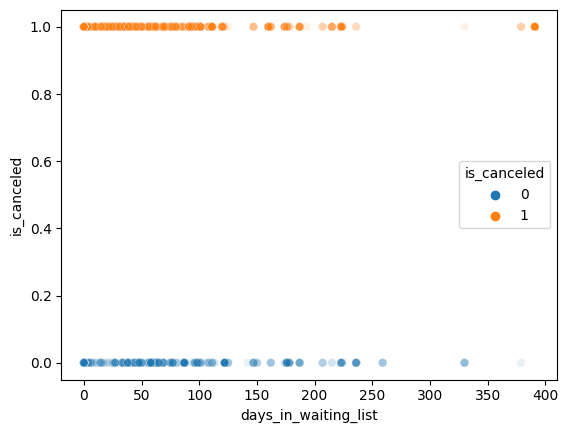

In [83]:
# graficar cancelado vs tiempo de espera
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [64]:
# Reservas canceladas por tipo de cliente
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
customer_type,,
Transient,21864,25585
Transient-Party,7736,4432
Contract,1155,878
Group,217,46


<Axes: xlabel='customer_type', ylabel='count'>

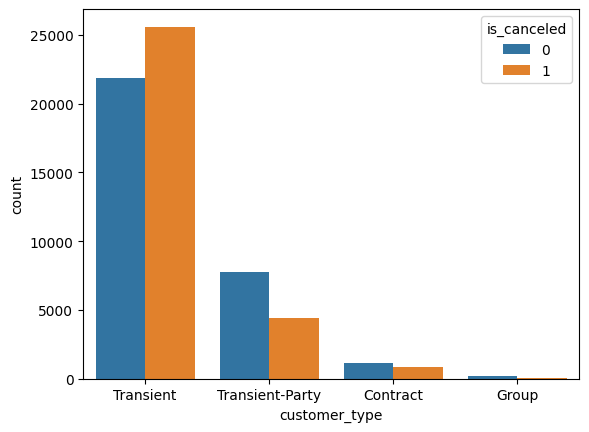

In [84]:
# graficareservas canceladas por tipo de cliente
sns.countplot(x='customer_type', data=hotel, hue='is_canceled')

In [65]:
# ¿Cuál es la proporción de reservas canceladas por clientes Transient en relación con el total de reservas realizadas por clientes Transient?
prop_cancelaciones_transient = len(hotel[(hotel['is_canceled'] == 1) & (hotel['customer_type'] == 'Transient')]) / len(hotel[(hotel['customer_type'] == 'Transient')]) *100
print(f"La proporción de reservas canceladas por clientes Transient es {prop_cancelaciones_transient:.2f}%")

La proporción de reservas canceladas por clientes Transient es 53.92%


In [66]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
adr,,
62.00,290,2106
90.00,420,1021
75.00,650,852
80.00,332,753
120.00,270,699
...,...,...
99.46,2,0
99.48,2,0
99.51,1,0


<Axes: xlabel='adr', ylabel='is_canceled'>

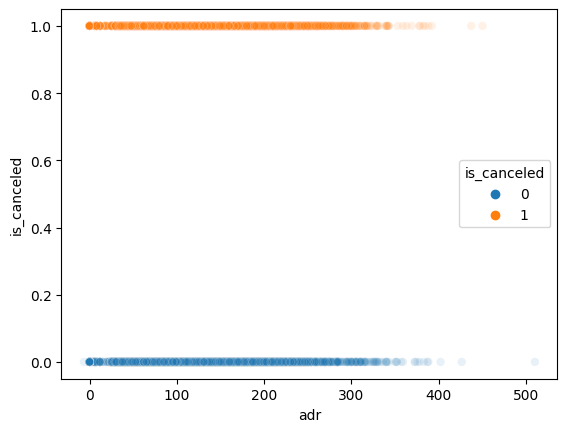

In [85]:
# Graficar canceldas por tarifa
sns.scatterplot(x='adr', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [67]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
country,,
PRT,8724,19226
GBR,4040,1693
ESP,2681,1529
FRA,3469,1340
ITA,985,926
...,...,...
MCO,1,0
SDN,1,0
CUB,4,0


<Axes: xlabel='country'>

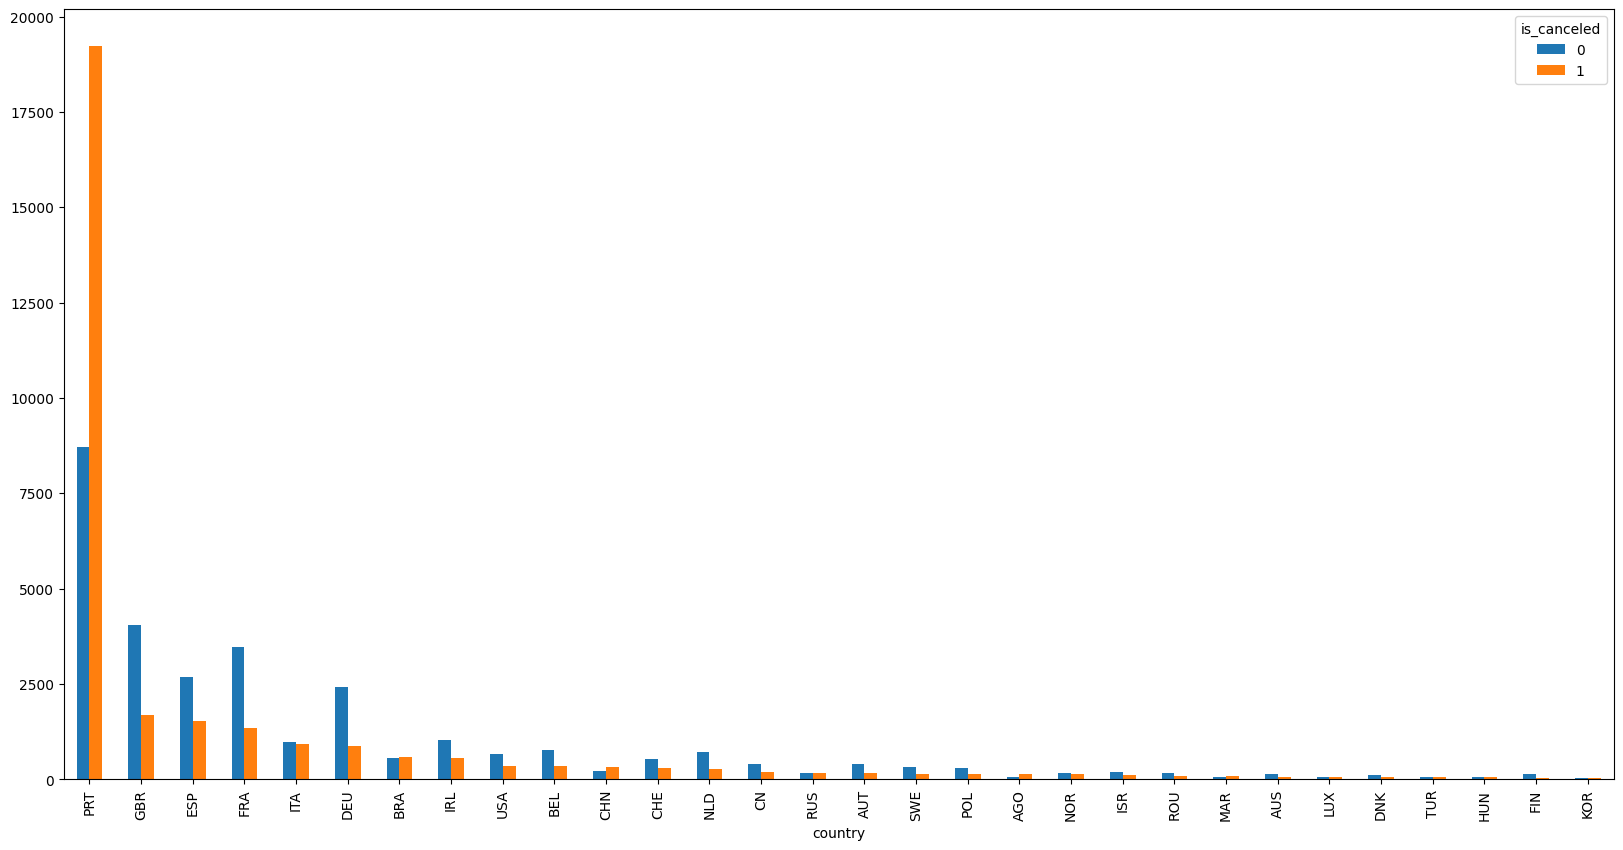

In [87]:
# graficar canceladas por 30 primeros paises
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False).head(30).plot(kind='bar', figsize=(20,10))


In [68]:
# Reservas canceladas segun si es un cliente repetido
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
is_repeated_guest,,
0,29643,30537
1,1329,404


Si es cliente repetido, no suelen cancelar tantas reservas como si son clientes nuevos

<Axes: xlabel='is_repeated_guest', ylabel='count'>

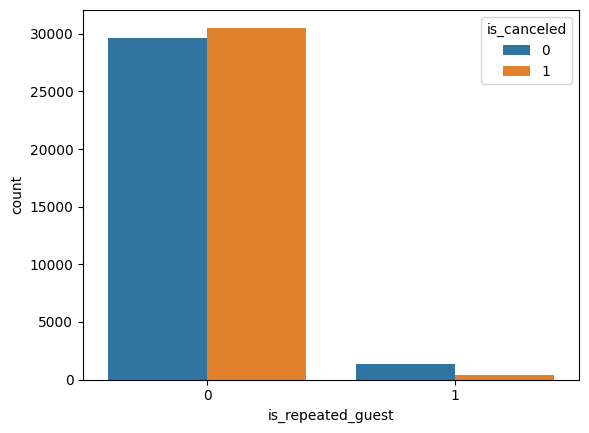

In [88]:
# graficareservas canceladas segun si es un cliente repetido
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled')

In [69]:
# Reservas canceladas segun el tipo de deposito
pd.crosstab(hotel['deposit_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
deposit_type,,
No Deposit,30885,20800
Non Refund,37,10113
Refundable,50,28


<Axes: xlabel='deposit_type', ylabel='count'>

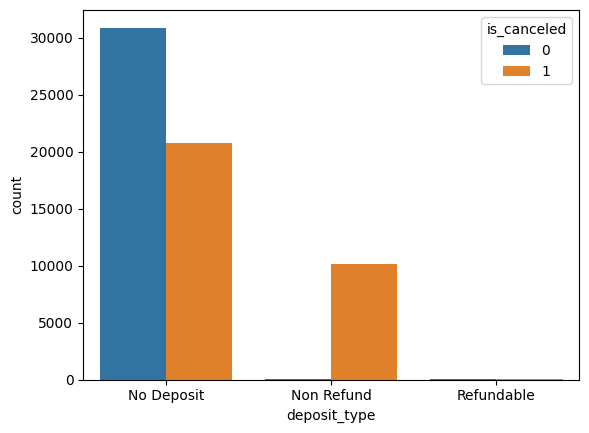

In [89]:
# graficareservas canceladas segun el tipo de deposito
sns.countplot(x='deposit_type', data=hotel, hue='is_canceled')

In [70]:
# Reservas canceladas segun el tipo de habitacion
pd.crosstab(hotel['assigned_room_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
assigned_room_type,,
A,17002,23005
D,7741,4449
E,2379,1400
F,1184,637
G,715,562
B,687,369
C,810,317
H,203,181
K,111,8


<Axes: xlabel='assigned_room_type', ylabel='count'>

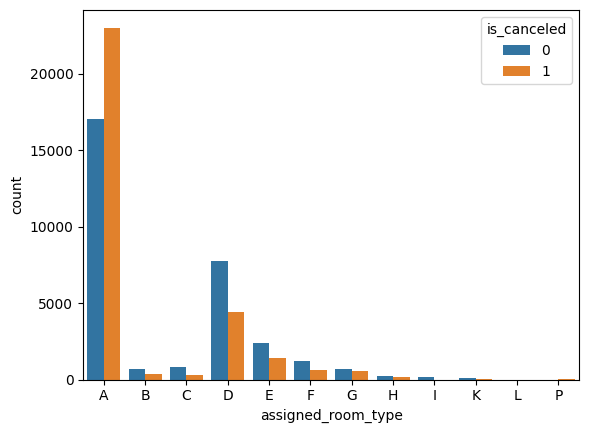

In [91]:
# graficareservas canceladas segun el tipo de habitacion ordendas por orden alfabetico
sns.countplot(x='assigned_room_type', data=hotel, hue='is_canceled', order=sorted(hotel['assigned_room_type'].unique()))

In [71]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


is_canceled,0,1
meal,,
BB,23693,24144
HB,3966,3486
SC,2785,2771
FB,144,333
Undefined,384,207


<Axes: xlabel='meal', ylabel='count'>

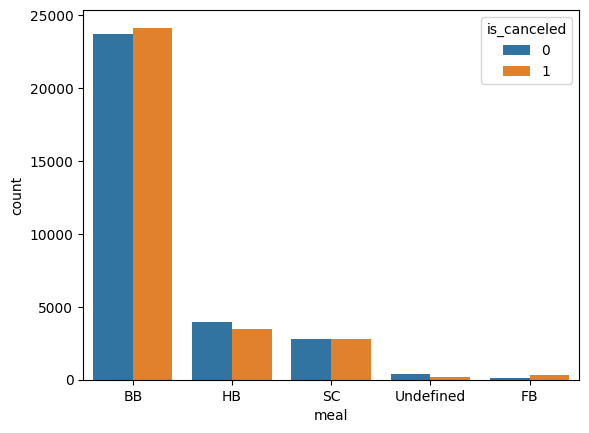

In [92]:
# graficareservas canceladas segun el tipo de comida
sns.countplot(x='meal', data=hotel, hue='is_canceled')

In [72]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
distribution_channel,,
TA/TO,23738,28111
Direct,5036,1763
Corporate,2135,1037
GDS,63,26
Undefined,0,4


<Axes: xlabel='distribution_channel', ylabel='count'>

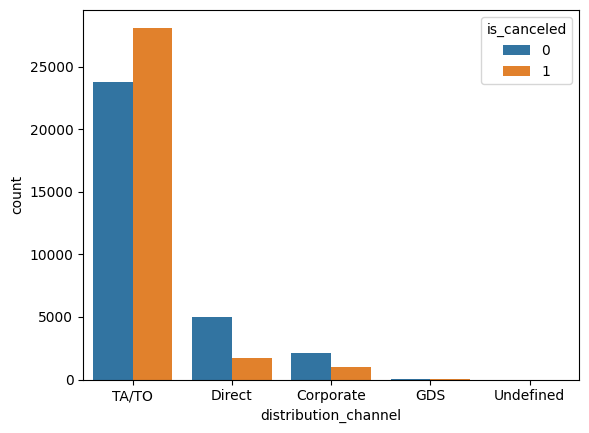

In [93]:
# graficar reservas canceladas segun el tipo de distribucion
sns.countplot(x='distribution_channel', data=hotel, hue='is_canceled')

In [73]:
# Reservas canceladas segun el tiempo entre la reserva y la llegada
pd.crosstab(hotel['lead_time'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
lead_time,,
0,2454,310
56,124,262
28,205,240
37,142,232
34,213,229
...,...,...
382,1,0
445,1,0
388,9,0


<Axes: xlabel='lead_time', ylabel='is_canceled'>

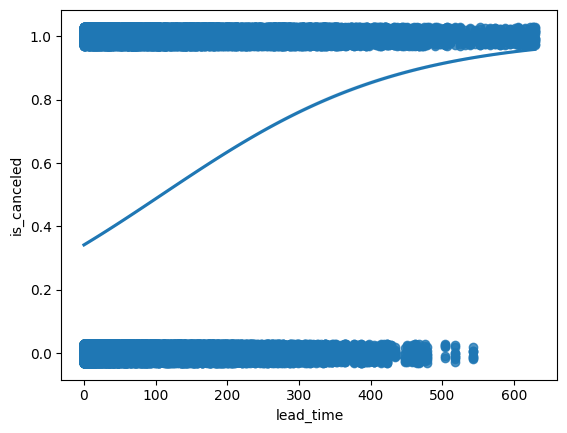

In [127]:
# graficar reservas canceladas segun el tiempo entre la reserva y la llegada
# sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.002)

sns.regplot(x='lead_time', y='is_canceled', data=hotel, logistic=True, y_jitter=0.03)


In [74]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


is_canceled                 0      1
adults children babies              
2      0.0      0       20171  22636
1      0.0      0        6691   4643
3      0.0      0        1548   1318
2      2.0      0         746    977
       1.0      0        1100    877
3      1.0      0         112    159
2      0.0      1         224     97
0      2.0      0          58     57
1      1.0      0          84     47
       2.0      0          41     36

In [75]:
# Correlacion de pearson de las variables con 'is_canceled'
correlacion = hotel.corr(method='pearson')
correlacion['is_canceled'].sort_values(ascending=False).reset_index()


C:\Users\Luca\AppData\Local\Temp\ipykernel_25564\1911941991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = hotel.corr(method='pearson')


,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


array([[<Axes: xlabel='is_canceled', ylabel='is_canceled'>,
        <Axes: xlabel='lead_time', ylabel='is_canceled'>,
        <Axes: xlabel='previous_cancellations', ylabel='is_canceled'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='is_canceled'>],
       [<Axes: xlabel='is_canceled', ylabel='lead_time'>,
        <Axes: xlabel='lead_time', ylabel='lead_time'>,
        <Axes: xlabel='previous_cancellations', ylabel='lead_time'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='lead_time'>],
       [<Axes: xlabel='is_canceled', ylabel='previous_cancellations'>,
        <Axes: xlabel='lead_time', ylabel='previous_cancellations'>,
        <Axes: xlabel='previous_cancellations', ylabel='previous_cancellations'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='previous_cancellations'>],
       [<Axes: xlabel='is_canceled', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='lead_time', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='previous_cancellations', yla

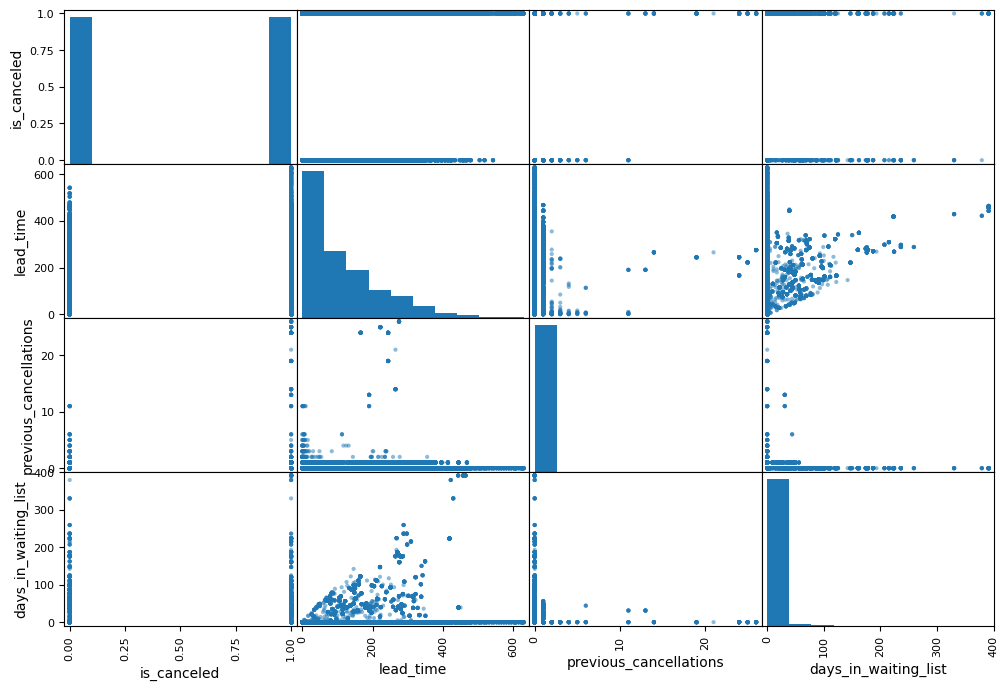

In [76]:
from pandas.plotting import scatter_matrix

attributes = ["is_canceled", "lead_time", "previous_cancellations", "days_in_waiting_list"]
scatter_matrix(hotel[attributes], figsize=(12, 8))

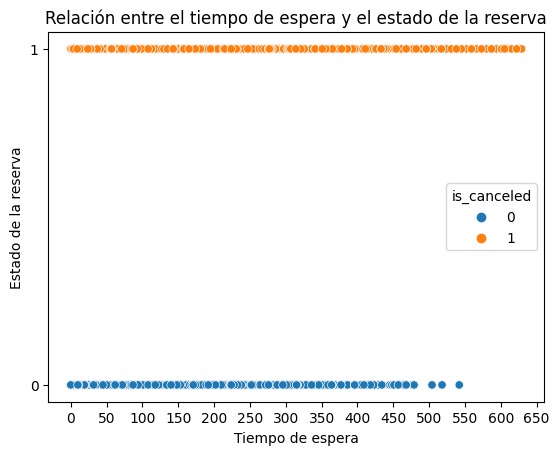

In [77]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

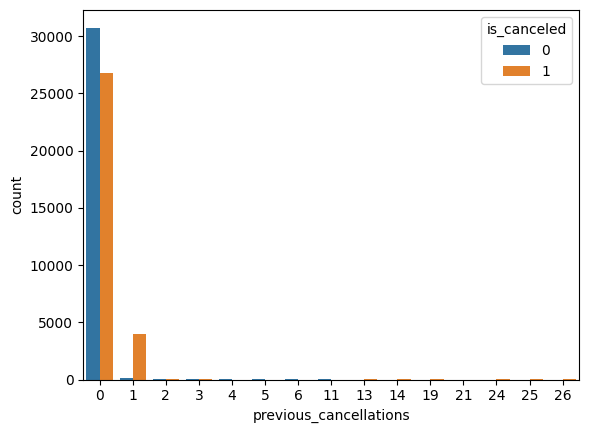

In [78]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()

<Axes: xlabel='arrival_date_week_number', ylabel='count'>

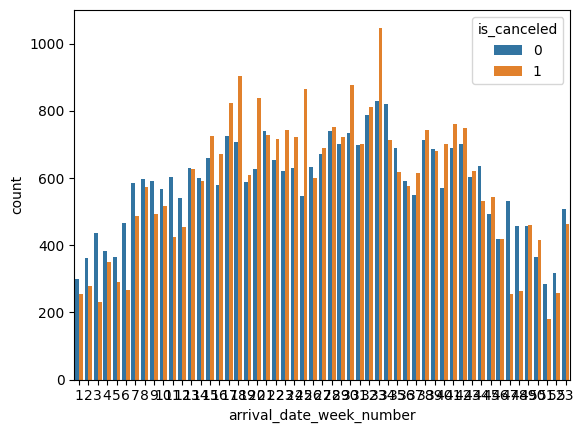

In [132]:
# graficar relacion entre 'arrival_date_year' y 'is_canceled'
# sns.countplot(x='arrival_date_year', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_day_of_month', hue='is_canceled', data=hotel)
sns.countplot(x='arrival_date_week_number', hue='is_canceled', data=hotel)


In [135]:
hotel_reducido = hotel.copy()

# combinar las columnas de fechas en una sola
hotel_reducido['arrival_date'] = hotel_reducido['arrival_date_year'].astype(str) + '-' + hotel_reducido['arrival_date_month'].astype(str) + '-' + hotel_reducido['arrival_date_day_of_month'].astype(str)
# eliminar las columnas de fechas
hotel_reducido.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# convertir la columna 'arrival_date' a tipo datetime
hotel_reducido['arrival_date'] = pd.to_datetime(hotel_reducido['arrival_date'])

hotel_reducido.head()

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled,arrival_date
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2015-10-31
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2016-10-13
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2016-12-12
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0,2017-03-19


<Axes: xlabel='arrival_date', ylabel='is_canceled'>

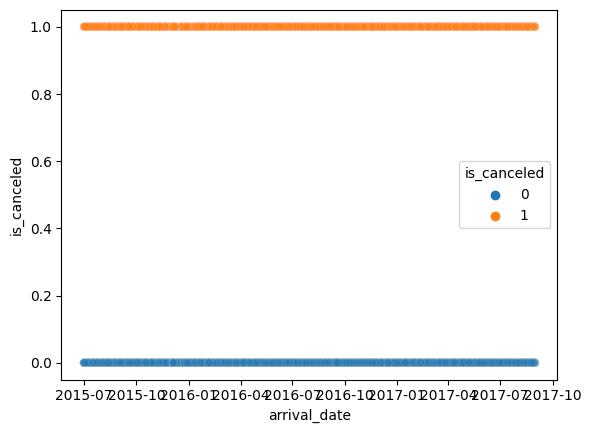

In [137]:
# graficar la relacion entre 'arrival_date' y 'is_canceled'
sns.scatterplot(x='arrival_date', y='is_canceled', data=hotel_reducido, hue='is_canceled', alpha=0.05)

<Axes: xlabel='hotel', ylabel='count'>

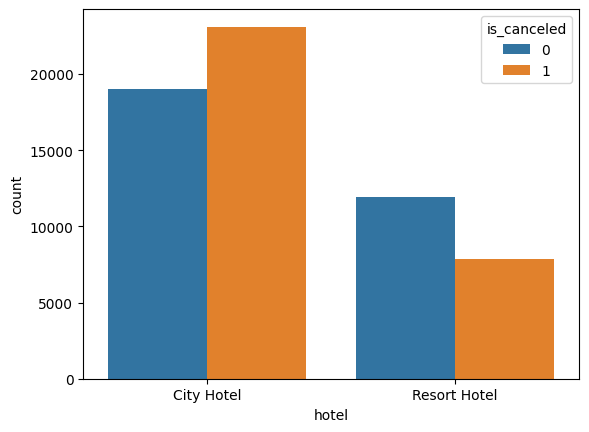

In [138]:
# graficar la relacion entre 'hotel' y 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=hotel_reducido)

In [152]:
# heatmap de correlacion de pearson


<Axes: xlabel='deposit_type', ylabel='hotel'>

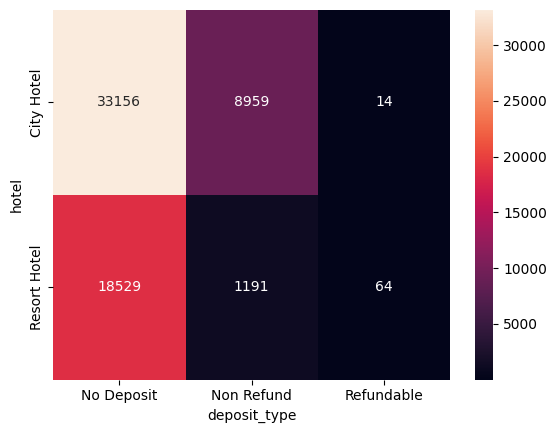

In [156]:
# heatmap hotel y deposit_type
sns.heatmap(pd.crosstab(hotel_reducido['hotel'], hotel_reducido['deposit_type']), annot=True, fmt='d')

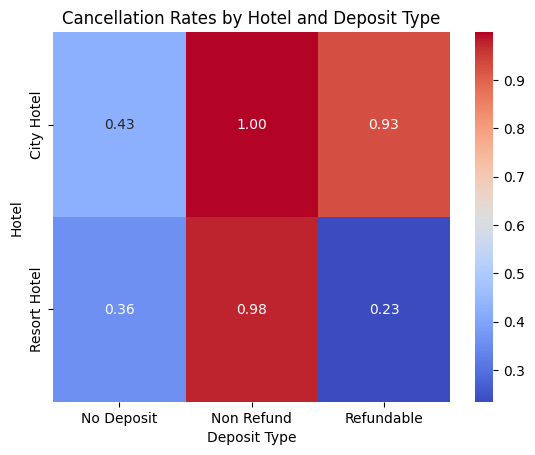

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# ...

# Pivot the data to create a matrix with 'hotel' and 'deposit_type' as the row and column indices
# and 'is_canceled' as the values
pivot_df = df.pivot_table(
    index='hotel', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Cancellation Rates by Hotel and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Hotel')

# Show the plot
plt.show()
